In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from sklearn.linear_model import LinearRegression

from pcntoolkit.dataio.norm_data import NormData
from pcntoolkit.normative_model import NormativeModel
from pcntoolkit.regression_model.blr import BLR
from pcntoolkit.util.plotter import plot_centiles

/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/output.py:207: UserWarning: Process: 38263 - 2025-05-12 16:55:32 - Warning: remove_NAN is set to False. Missing (NaN) values may cause errors during model creation or training.
  warnings.warn(message)


Process: 38263 - 2025-05-12 16:55:32 - Dataset "dummy" created.
    - 5000 observations
    - 500 unique subjects
    - 1 covariates
    - 2 response variables
    - 1 batch effects:
    	groups (5)
    


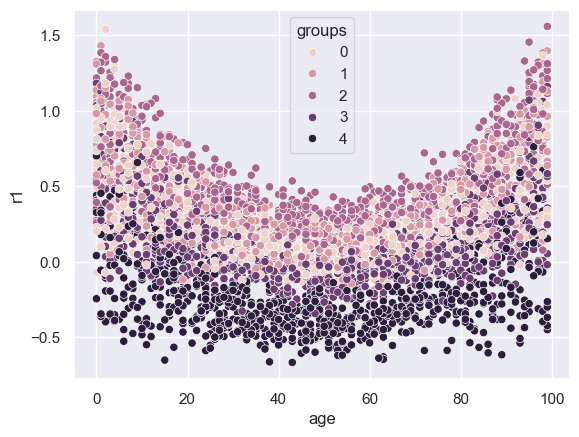

In [2]:
n_subjects = 500
n_samples = 5000
max_age = 100
np.random.seed(20)
subjects = np.random.choice(n_subjects, n_samples, replace=True)
coefs = np.random.rand(n_subjects, 2)
n_groups = 5
groups = np.random.choice(n_groups, n_subjects, replace=True)
groups = groups[subjects]
group_offsets = np.random.randn(n_groups) * 0.003
covariates = np.random.choice(max_age, n_samples).astype(float)
responses1 = (
    0.05 * (covariates / max_age - 1 / 2) ** 2 * coefs[subjects, 0] + np.random.randn(n_samples) * 0.001 + group_offsets[groups]
)
responses2 = (
    0.05 * (covariates / max_age - 1 / 2) ** 3 * coefs[subjects, 1] + np.random.randn(n_samples) * 0.001 + group_offsets[groups]
)
responses = np.stack((responses1, responses2), axis=1) * 100
df = pd.DataFrame({"age": covariates, "r1": responses[:, 0], "r2": responses[:, 1], "subjects": subjects, "groups": groups})
sns.scatterplot(df, x="age", y="r1", hue="groups")
data = NormData.from_dataframe(
    name="dummy", dataframe=df, covariates=["age"], batch_effects=["groups"], response_vars=["r1", "r2"], subject_ids="subjects"
)
train, test = data.train_test_split(splits=0.9)

In [3]:
from pcntoolkit import BsplineBasisFunction

regmodel = BLR(
    heteroskedastic=True,
    intercept=True,
    intercept_var=True,
    fixed_effect=True,
    basis_function_mean=BsplineBasisFunction(0, 3, 5),
    basis_function_var=BsplineBasisFunction(0, 3, 5),
)
model = NormativeModel(template_regression_model=regmodel, inscaler="none", outscaler="none")
model.fit(train)

Process: 38263 - 2025-05-12 16:55:32 - Fitting models on 2 response variables.
Process: 38263 - 2025-05-12 16:55:32 - Fitting model for r1.


/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/regression_model/blr.py:474: LinAlgWarning: Ill-conditioned matrix (rcond=2.32326e-18): result may not be accurate.
  invAXt: np.ndarray = linalg.solve(self.A, X.T, check_finite=False)
/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/output.py:207: UserWarning: Process: 38263 - 2025-05-12 16:55:35 - Estimation of posterior distribution failed due to: 
Matrix is not positive definite
  warnings.warn(message)
/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/regression_model/blr.py:474: LinAlgWarning: Ill-conditioned matrix (rcond=4.07166e-18): result may not be accurate.
  invAXt: np.ndarray = linalg.solve(self.A, X.T, check_finite=False)
/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/regression_model/blr.py:474: LinAlgWarning: Ill-conditioned matrix (rcond=2.9599e-18): result may not be accurate.
  invAXt: np.ndarray = linalg.solve(self.

Process: 38263 - 2025-05-12 16:55:35 - Fitting model for r2.
Process: 38263 - 2025-05-12 16:55:38 - Making predictions on 2 response variables.
Process: 38263 - 2025-05-12 16:55:38 - Computing z-scores for 2 response variables.
Process: 38263 - 2025-05-12 16:55:38 - Computing z-scores for r1.
Process: 38263 - 2025-05-12 16:55:38 - Computing z-scores for r2.
Process: 38263 - 2025-05-12 16:55:38 - Computing centiles for 2 response variables.
Process: 38263 - 2025-05-12 16:55:38 - Computing centiles for r1.
Process: 38263 - 2025-05-12 16:55:39 - Computing centiles for r2.
Process: 38263 - 2025-05-12 16:55:39 - Computing log-probabilities for 2 response variables.
Process: 38263 - 2025-05-12 16:55:39 - Computing log-probabilities for r1.
Process: 38263 - 2025-05-12 16:55:40 - Computing log-probabilities for r2.
Process: 38263 - 2025-05-12 16:55:40 - Dataset "synthesized" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 2 response variables
    - 1 batch ef

/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)
/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


Process: 38263 - 2025-05-12 16:55:41 - Saving model to:
	./saves.


/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/math_functions/thrive.py:97: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * np.log((1 + cor) / (1 - cor))


Process: 38263 - 2025-05-12 16:56:37 - Dataset "synthesized" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 2 response variables
    - 1 batch effects:
    	groups (5)
    
Process: 38263 - 2025-05-12 16:56:37 - Synthesizing data for 2 response variables.
Process: 38263 - 2025-05-12 16:56:37 - Synthesizing data for r1.
Process: 38263 - 2025-05-12 16:56:37 - Synthesizing data for r2.
Process: 38263 - 2025-05-12 16:56:37 - Computing centiles for 2 response variables.
Process: 38263 - 2025-05-12 16:56:37 - Computing centiles for r1.
Process: 38263 - 2025-05-12 16:56:37 - Computing centiles for r2.
Process: 38263 - 2025-05-12 16:56:37 - Harmonizing data on 2 response variables.
Process: 38263 - 2025-05-12 16:56:37 - Harmonizing data for r1.
Process: 38263 - 2025-05-12 16:56:37 - Harmonizing data for r2.


/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


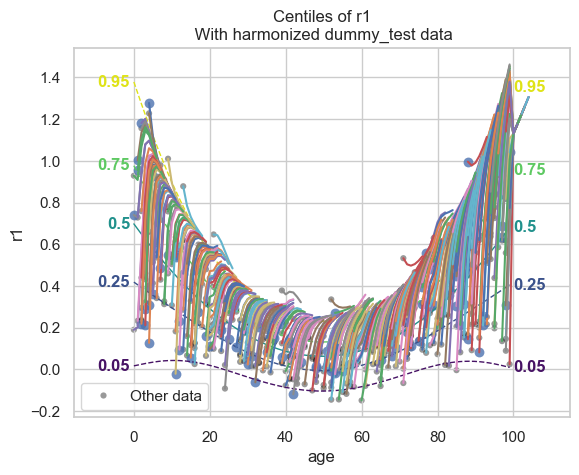

/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


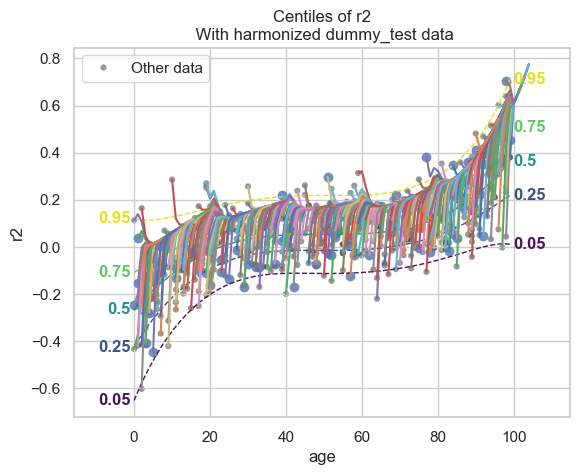

In [7]:
plot_centiles(model, scatter_data=test, show_thrivelines=True, harmonize_data=True, z_thrive=1, show_other_data=True)

/opt/anaconda3/envs/dev_refactor/lib/python3.12/site-packages/pcntoolkit/math_functions/thrive.py:97: RuntimeWarning: divide by zero encountered in divide
  return 0.5 * np.log((1 + cor) / (1 - cor))


<xarray.DataArray (response_vars: 2, age_1: 100, age_2: 100)> Size: 160kB
array([[[0.        , 0.99947242, 0.97982737, ..., 0.        ,
         0.        , 0.        ],
        [0.99947242, 0.        , 0.65000218, ..., 0.        ,
         0.        , 0.        ],
        [0.97982737, 0.65000218, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.47027908, 0.47275211],
        [0.        , 0.        , 0.        , ..., 0.47027908,
         0.        , 0.47523369],
        [0.        , 0.        , 0.        , ..., 0.47275211,
         0.47523369, 0.        ]],

       [[0.        , 0.99037974, 0.87914048, ..., 0.        ,
         0.        , 0.        ],
        [0.99037974, 0.        , 0.32570246, ..., 0.        ,
         0.        , 0.        ],
        [0.87914048, 0.32570246, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.34472638, 0.34831941],
        [0.        , 0.        , 0.        , ..., 0.34472638,
         0.        , 0.35190038],
        [0.        , 0.        , 0.        , ..., 0.34831941,
         0.35190038, 0.        ]]])
Coordinates:
  * response_vars  (response_vars) <U2 16B 'r1' 'r2'
  * age_1          (age_1) int64 800B 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * age_2          (age_2) int64 800B 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99

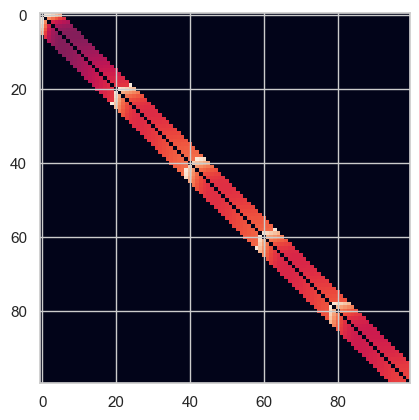

In [5]:
plt.imshow(model.correlation_matrix[0])
from pcntoolkit.math_functions.thrive import get_correlation_matrix

get_correlation_matrix(train, 6)

In [5]:
def design_matrix(bandwidth: int, Sigma: np.ndarray) -> pd.DataFrame:
    """Constructs a design matrix according to: Buuren, S. Evaluation and prediction of individual growth trajectories. Ann. Hum. Biol. 50, 247–257 (2023).

    Args:
        bandwidth (int): The bandwidth for which the covariance has been computed
        Sigma np.ndarray: Covariate matrix with possibly missing values. The 0'th column represents an age of 0.
    Returns:
        pd.DataFrame: A design matrix with regressors and predictors. The matrix may have missing values in the 'y' column.
    """
    max_age = Sigma.shape[0] - 1
    Ages = np.arange(max_age)
    dfs = []
    for offset in range(1, bandwidth + 1):
        ages_i = Ages[: max_age - offset + 1]
        df_i = pd.DataFrame(index=ages_i)
        df_i["v0"] = 1
        df_i["V1"] = np.log(ages_i + (offset / 2))
        df_i["V2"] = np.log(offset)
        df_i["V3"] = 1 / offset
        df_i["V4"] = df_i["V1"] * df_i["V2"]
        df_i["V5"] = df_i["V1"] ** 2
        df_i["y"] = np.diagonal(Sigma, offset)
        dfs.append(df_i)
    df = pd.concat(dfs, axis=0)
    return df


def offset_indices(max_age: int, bandwidth: int):
    """Generate pairs of indices that iterate over all the cells in the upper triangular region specified by the parameters.

    E.g:
    Offset_indices(3, 2) will yield (0,1) -> (0,2) -> (1,2) -> (1,3) -> (2,3)
    Which index these positions:
    _,0,1,_
    _,_,2,3
    _,_,_,4
    _,_,_,_

    Args:
        max_age (int): max age for which indices are generated (includes 0)
        bandwidth (int): the bandwidth within which the indices are computed

    Yields:
        (int, int): pairs of indices
    """
    acc = np.zeros((max_age + 1, max_age + 1))
    acc[np.triu_indices(max_age + 1, 1)] = 1
    acc[np.triu_indices(max_age + 1, bandwidth + 1)] = 0
    for pair in zip(*np.where(acc)):
        yield pair


def fill_missing(bandwidth: int, cors: np.ndarray) -> np.ndarray:
    """Fills in missing correlation values according to:

    Args:
        bandwidth (int): the bandwidth within which the indices are filled in
        cors (np.ndarray): possibly incomplete correlation matrix of shape [n_responsevars, n_ages, n_ages]

    Returns:
        np.ndarray: New matrix completed with predicted values
    """
    max_age = cors.shape[1] - 1
    newcors = np.zeros_like(cors)
    # Loop over response variables
    for rv in range(cors.shape[0]):
        # Create design matrix
        Phi = design_matrix(bandwidth, cors[rv])
        # Drop rows with NaN
        Xy = Phi.dropna(axis=0, inplace=False)
        # Fit regressionmodel to cleaned data
        regmodel = LinearRegression(fit_intercept=False).fit(Xy.drop(columns="y", inplace=False), y=Xy[["y"]])
        # Use that to infer all rows including the rows with NaN
        y_pred = regmodel.predict(Phi.drop(columns="y"))
        # Fill in the predicted correlations
        for i, (age1, age2) in enumerate(offset_indices(max_age, bandwidth)):
            newcors[rv, age1, age2] = newcors[rv, age2, age1] = y_pred[i].item()
    # Inverse Fisher transform (tanh)
    newcors = np.tanh(newcors)
    # Take only the predicted values where there were missing values
    newcors = np.where(np.isnan(cors), newcors, cors)
    return newcors


def get_single_thriveline(cors, acc=1, z_thrive=-1.96):
    thriveline = np.zeros_like(cors)
    for i, c in enumerate(cors):
        acc = c * acc + np.sqrt(1 - c**2) * z_thrive
        thriveline[i] = acc
    return thriveline


def get_correlation_matrix(data: NormData, bandwidth: int, covariate_name="age"):
    # Needs docstring
    df = data.to_dataframe()[["X", "Y", "batch_effects", "subjects"]].droplevel(level=0, axis=1)
    # create dictionary of (age:indices)
    grps = df.groupby(covariate_name).indices | defaultdict(list)
    # get the max age in the dataset
    max_age = int(max(list(grps.keys())))
    # the number of response variable for which to compute correlations
    n_responsevars = len(data.response_vars.to_numpy())
    # create empty correlation matrix
    cors = np.tile(np.eye(max_age + 1), (n_responsevars, 1, 1))
    for age1, age2 in offset_indices(max_age, bandwidth):
        # merge two ages on subjects
        merged = pd.merge(df.iloc[grps[age1]], df.iloc[grps[age2]], how="inner", on="subjects")
        if len(merged) >= 4:
            # Compute correlations if there are enough samples
            for i, rv in enumerate(data.response_vars.to_numpy()):
                cors[i, age2, age1] = cors[i, age1, age2] = merged[f"{rv}_x"].corr(merged[f"{rv}_y"])
        else:
            # Otherwise, set all response variables to NaN for these ages
            cors[:, age2, age1] = cors[:, age1, age2] = np.NaN
    # Fill in missing correlation values
    newcors = fill_missing(bandwidth, cors)
    newcors = xr.DataArray(
        newcors,
        dims=("response_vars", f"{covariate_name}_1", f"{covariate_name}_2"),
        coords={
            "response_vars": data.response_vars.to_numpy(),
            f"{covariate_name}_1": np.arange(cors.shape[1]),
            f"{covariate_name}_2": np.arange(cors.shape[1]),
        },
    )
    return newcors


def get_thrivelines(cors, start_age, stop_age, step_age, length_v, start_z, end_z, z_thrive):
    thrivelines_ = np.zeros(((end_z - start_z) * (stop_age - start_age) // step_age, length_v))
    ages_ = np.zeros_like(thrivelines_)
    i = 0
    for age in range(start_age, stop_age, step_age):
        cor_slice = cors[age : age + length_v - 1]
        ages = np.arange(age, age + length_v)
        for z in range(start_z, end_z):
            line = get_single_thriveline(cor_slice, acc=z, z_thrive=z_thrive)
            to_pad = length_v - len(line)
            thrivelines_[i] = np.pad(line, ((0, to_pad)), mode="edge")
            ages_[i] = ages
            i += 1
    thrivelines_ = np.array(thrivelines_)
    ages_ = np.array(ages_)
    return thrivelines_, ages_[: len(thrivelines_)]


bandwidth = 2
cors, newcors = get_correlation_matrix(data, bandwidth)
diagonal = newcors[1].diagonal(-1)
length_of_thrivelines = 6
thrive_Z, ages = get_thrivelines(diagonal, 0, 10, 1, length_of_thrivelines, -3, 3, 1.0)
shaped_lines = thrive_Z.reshape((-1, length_of_thrivelines))
shaped_ages = ages.reshape((-1, length_of_thrivelines))
plt.plot(shaped_ages.T, shaped_lines.T)
plt.show()

AttributeError: 'DataArray' object has no attribute 'diagonal'

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pcntoolkit.dataio.norm_data import NormData
from pcntoolkit.normative_model import NormativeModel
from pcntoolkit.regression_model.blr import BLR
from pcntoolkit.util.output import Output, Warnings

Output
Warnings


def get_thrive_Z_X(cors: xr.DataArray, start_x: xr.DataArray, start_z: xr.DataArray, span: int, z_thrive=1.96):
    assert start_x.shape == start_z.shape
    assert cors.shape[0] == cors.shape[1]
    padded_cors = np.pad(cors, ((0, span), (0, span)), mode="edge")
    thrive_Z = np.zeros((start_x.shape[0], span + 1))
    thrive_X = np.zeros_like(thrive_Z).astype(int)
    thrive_X[:, 0] = start_x
    thrive_Z[:, 0] = start_z
    for i in range(span):
        thrive_X[:, i + 1] = thrive_X[:, i] + 1
        this_cors = padded_cors[thrive_X[:, i], thrive_X[:, i + 1]]
        thrive_Z[:, i + 1] = thrive_Z[:, i] * this_cors + np.sqrt(1 - this_cors**2) * z_thrive
    thrive_Z = xr.DataArray(thrive_Z, dims=("observations", "offset"))
    thrive_X = xr.DataArray(thrive_X, dims=("observations", "offset"))
    return thrive_Z, thrive_X


def compute_thrivelines(
    self: NormativeModel, data: NormData, span: int = 5, step: int = 1, covariate="age", **kwargs
) -> NormData:
    """
    Computes the thrivelines for each responsevar in the data
    """
    # TODO: Compute correlation matrix during fit
    # TODO: Write utility function to create a normdata object for easy thriveline creation (with appropriate Z scores)
    offsets = np.arange(0, span + 1, step=step)
    # Compute the thrivelines
    # Add them to the dataset, label them correctly

    # Drop the thrivelines and dimensions if they already exist
    centiles_already_computed = "thrive_Z" in data or "thrive_Y" in data or "offset" in data.coords
    if centiles_already_computed:
        if not kwargs.get("recompute", False):
            if all([c in data.offset.values for c in offsets]):
                Output.warning(Warnings.THRIVELINES_ALREADY_COMPUTED_FOR, dataset_name=data.attrs["name"], offsets=offsets)
                return data
        data = data.drop_vars(["thrive_Z"])
        data = data.drop_vars(["thrive_Y"])
        data = data.drop_dims(["offset"])

    # Make Z-score predictions if needed
    if not hasattr(data, "Z"):
        self.predict(data)

    respvar_intersection = list(set(self.response_vars).intersection(data.response_vars.values))

    # Get the covariate matrix that was derived during fit
    cormat = get_correlation_matrix(data, 3, covariate)

    # Create X, Y, and Z for thrivelines data
    data["thrive_Z"] = xr.DataArray(
        np.zeros((data.X.shape[0], len(respvar_intersection), offsets.shape[0])),
        dims=("observations", "response_vars", "offset"),
        coords={"offset": offsets},
    )
    data["thrive_Y"] = xr.DataArray(
        np.zeros((data.X.shape[0], len(respvar_intersection), offsets.shape[0])),
        dims=("observations", "response_vars", "offset"),
        coords={"offset": offsets},
    )
    data["thrive_X"] = xr.DataArray(
        np.zeros((data.X.shape[0], offsets.shape[0])),
        dims=("observations", "offset"),
        coords={"offset": offsets},
    )
    for responsevar in respvar_intersection:
        resp_predict_data = data.sel({"response_vars": responsevar})
        X, be, be_maps, m, Z = self.extract_data(resp_predict_data)
        X_cov = X.sel({"covariates": covariate})
        thrive_Z, thrive_X = get_thrive_Z_X(cormat.sel({"response_vars": responsevar}), X_cov, Z, span)
        data["thrive_X"] = xr.DataArray(
            thrive_X,
            dims=("observations", "offset"),
            coords={"offset": offsets},
        )
        data["thrive_Z"].loc[{"response_vars": responsevar}] = thrive_Z
        for io, o in enumerate(offsets):
            this_Z = thrive_Z[:, io]
            data["thrive_Y"].loc[{"response_vars": responsevar, "offset": o}] = self[responsevar].backward(X, be, be_maps, this_Z)
    self.postprocess(data)
    return data


compute_thrivelines(model, data, recompute=True)

Process: 90043 - 2025-05-12 14:38:50 - Making predictions on 2 response variables.
Process: 90043 - 2025-05-12 14:38:50 - Computing z-scores for 2 response variables.
Process: 90043 - 2025-05-12 14:38:50 - Computing z-scores for r1.
Process: 90043 - 2025-05-12 14:38:51 - Computing z-scores for r2.
Process: 90043 - 2025-05-12 14:38:51 - Computing centiles for 2 response variables.
Process: 90043 - 2025-05-12 14:38:51 - Computing centiles for r1.
Process: 90043 - 2025-05-12 14:38:51 - Computing centiles for r2.
Process: 90043 - 2025-05-12 14:38:52 - Computing log-probabilities for 2 response variables.
Process: 90043 - 2025-05-12 14:38:52 - Computing log-probabilities for r1.
Process: 90043 - 2025-05-12 14:38:52 - Computing log-probabilities for r2.
Process: 90043 - 2025-05-12 14:38:53 - Dataset "synthesized" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 2 response variables
    - 1 batch effects:
    	dummy_batch_effect (1)
    
Process: 90043 - 2025

<xarray.NormData> Size: 3MB
Dimensions:            (observations: 5000, response_vars: 2, covariates: 1,
                        batch_effect_dims: 1, centile: 5, statistic: 10,
                        offset: 6)
Coordinates:
  * observations       (observations) int64 40kB 0 1 2 3 ... 4996 4997 4998 4999
  * response_vars      (response_vars) <U2 16B 'r1' 'r2'
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U18 72B 'dummy_batch_effect'
  * centile            (centile) float64 40B 0.05 0.25 0.5 0.75 0.95
  * statistic          (statistic) <U8 320B 'MACE' 'MAPE' ... 'SMSE' 'ShapiroW'
  * offset             (offset) int64 48B 0 1 2 3 4 5
Data variables: (12/13)
    subjects           (observations) int64 40kB 393 899 1130 ... 1214 1181 1171
    Y                  (observations, response_vars) float64 80kB 47.01 ... 12.2
    X                  (observations, covariates) float64 40kB 2.0 3.0 ... 12.0
    batch_effects      (observations, batch_effect_dims) <U32 640kB '0.0' ......
    Z                  (observations, response_vars) float64 80kB 0.8157 ... ...
    centiles           (centile, observations, response_vars) float64 400kB -...
    ...                 ...
    Y_harmonized       (observations, response_vars) float64 80kB 47.01 ... 12.2
    Yhat               (observations, response_vars) float64 80kB 0.1686 ... ...
    statistics         (response_vars, statistic) float64 160B 0.05128 ... 0....
    thrive_Z           (observations, response_vars, offset) float64 480kB 0....
    thrive_Y           (observations, response_vars, offset) float64 480kB 0....
    thrive_X           (observations, offset) int64 240kB 2 3 4 5 ... 15 16 17
Attributes:
    real_ids:                       True
    is_scaled:                      False
    name:                           dummy
    unique_batch_effects:           {'dummy_batch_effect': ['0.0']}
    batch_effect_counts:            {'dummy_batch_effect': {'0.0': 5000}}
    batch_effect_covariate_ranges:  {'dummy_batch_effect': {'0.0': {'age': {'...
    covariate_ranges:               {'age': {'min': 0.0, 'max': 19.0}}

In [ ]:
X_thrive = data["thrive_X"]
Y_thrive = data["thrive_Y"].sel({"response_vars": "r1"})
plt.plot(X_thrive.T, Y_thrive.T)

In [48]:
# def get_single_thriveline_2(cors: np.ndarray, start_x: np.ndarray, start_z: np.ndarray, span: int, z_thrive=1.96):
#     assert start_x.shape == start_z.shape
#     assert cors.shape[0] == cors.shape[1]
#     padded_cors = np.pad(cors, ((0, span), (0, span)), mode="edge")
#     lines = np.zeros((start_x.shape[0], span + 1))
#     xs = np.zeros_like(lines).astype(int)
#     xs[:, 0] = start_x
#     lines[:, 0] = start_z
#     for i in range(span):
#         xs[:, i + 1] = xs[:, i] + 1
#         this_cors = padded_cors[xs[:, i], xs[:, i + 1]]
#         lines[:, i + 1] = lines[:, i] * this_cors + np.sqrt(1 - this_cors**2) * z_thrive
#     return lines, xs

In [ ]:
cors, newcors = get_correlation_matrix(data, bandwidth)
model.predict(data)

In [ ]:
z_start = data
data

In [94]:
z_start = data.Y.sel({"response_vars": "r1"}).to_numpy()

a, b = get_single_thriveline_2(cors[0], covariates.astype(int), start_z=z_start, span=5, z_thrive=0)

In [ ]:
plt.plot(b.T, a.T)